# Qualifying results overview

Plot the qualifying result with visualization the fastest times.


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta

import fastf1
import fastf1.plotting
from fastf1.core import Laps


# Enable Matplotlib patches for plotting timedelta values
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


session = fastf1.get_session(2024, 'Baku', 'Q')
session.load()

C:\Users\csnec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
C:\Users\csnec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req  

First, we need to get an array of all drivers.



In [18]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['LEC' 'PIA' 'SAI' 'PER' 'RUS' 'VER' 'HAM' 'ALO' 'COL' 'ALB' 'BEA' 'TSU'
 'HUL' 'STR' 'RIC' 'NOR' 'BOT' 'ZHO' 'OCO' 'GAS']


After that we'll get each driver's fastest lap, create a new laps object
from these laps, sort them by lap time and have pandas reindex them to
number them nicely by starting position.



In [19]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps) \
    .sort_values(by='LapTime') \
    .reset_index(drop=True)

The plot is nicer to look at and more easily understandable if we just plot
the time differences. Therefore, we subtract the fastest lap time from all
other lap times.



In [20]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

We can take a quick look at the laps we have to check if everything
looks all right. For this, we'll just check the 'Driver', 'LapTime'
and 'LapTimeDelta' columns.



In [21]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     LEC 0 days 00:01:41.365000        0 days 00:00:00
1     PIA 0 days 00:01:41.686000 0 days 00:00:00.321000
2     SAI 0 days 00:01:41.805000 0 days 00:00:00.440000
3     PER 0 days 00:01:41.813000 0 days 00:00:00.448000
4     RUS 0 days 00:01:41.874000 0 days 00:00:00.509000
5     VER 0 days 00:01:42.023000 0 days 00:00:00.658000
6     HAM 0 days 00:01:42.289000 0 days 00:00:00.924000
7     ALO 0 days 00:01:42.369000 0 days 00:00:01.004000
8     COL 0 days 00:01:42.473000 0 days 00:00:01.108000
9     ALB 0 days 00:01:42.840000 0 days 00:00:01.475000
10    BEA 0 days 00:01:42.968000 0 days 00:00:01.603000
11    TSU 0 days 00:01:43.035000 0 days 00:00:01.670000
12    GAS 0 days 00:01:43.088000 0 days 00:00:01.723000
13    HUL 0 days 00:01:43.101000 0 days 00:00:01.736000
14    STR 0 days 00:01:43.370000 0 days 00:00:02.005000
15    RIC 0 days 00:01:43.547000 0 days 00:00:02.182000
16    NOR 0 days 00:01:43.609000 0 days 00:00:02

Finally, we'll create a list of team colors per lap to color our plot.



In [22]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)

Now, we can plot all the data



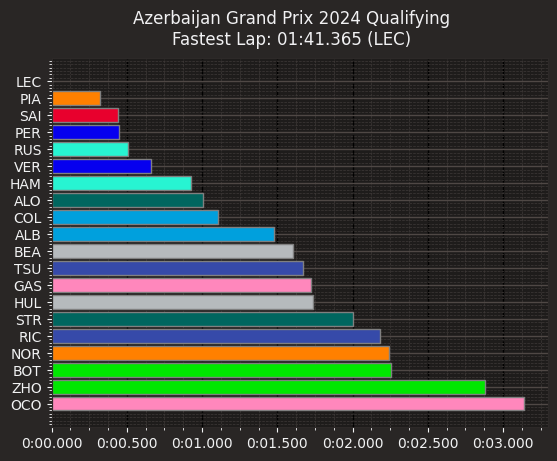

In [25]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()